In [6]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
from PIL import Image
from skimage import morphology
import matplotlib.pyplot as plt
    
from src.data import *
from src.transforms import *
from src.dataset import *
from src.config import *

In [7]:
test_locations = {
    'Highlands': (-106.87053, 39.14603),
    'Boulder': (-105.290, 40.013679),
    'Bishop': (-118.67637, 37.33904),
    'ColoradoSprings': (-104.86, 38.7684)
}
tile_url = terrain_tile_url(*test_locations['ColoradoSprings'], 12)
terrain = download_tile(tile_url)
elevation = decode_elevation(np.array(terrain))

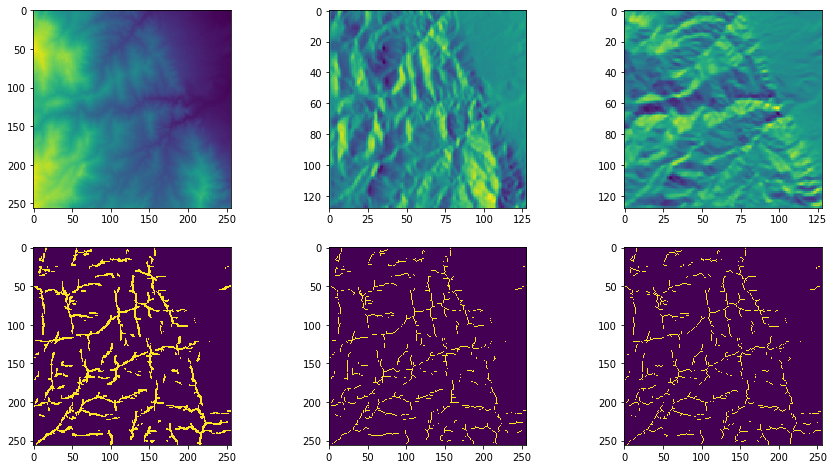

In [8]:
elevation_reduced = resize(elevation, size=(128, 128))

grad_x = gradient_x(elevation_reduced)
curvature_x = gradient_x(grad_x)
curv_x = gradient_x(grad_x > 0)

grad_y = gradient_y(elevation_reduced)
curvature_y = gradient_y(grad_y)
curv_y = gradient_y(grad_y > 0)

curv_xy = (curv_x<0) + (curv_y<0)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,8))

ax1.imshow(elevation)
ax2.imshow(grad_x)
ax3.imshow(grad_y)
rough_ridges = ridges(elevation)
ax4.imshow(rough_ridges)
ax5.imshow(morphology.skeletonize(rough_ridges))
ax6.imshow(morphology.thin(rough_ridges))

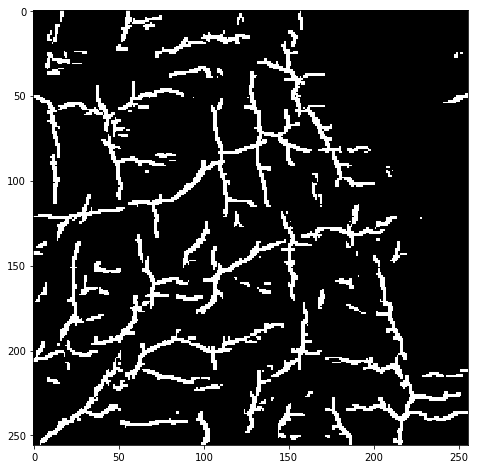

In [11]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
plt.imshow(rough_ridges, cmap='gray')

In [3]:
png_to_tif('../data/terrain/Colorado/png', '../data/terrain/Colorado/tif')

In [43]:
create_masks('../data/terrain/Colorado/tif', '../data/terrain/Colorado/mask')